In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# standards
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 200
matplotlib.rcParams['lines.linewidth'] = 1
heuncolor = "tab:orange"
leapcolor = "tab:green"
analcolor = "tab:blue"
matscolor = "tab:red"

In [3]:
# constants
dt = 300
length = 720
f = 1e-4
u0 = 10
v0 = 0
time = np.arange(0, dt*length, dt) # in s
timeh = time / 3600

# Analytic Solution

In [4]:
def analytic(u0, v0, time):
    u = v0 * np.sin(f*time) + u0 * np.cos(f*time)
    v = v0 * np.cos(f*time) - u0 * np.sin(f*time)
    return u, v

# Forward

In [5]:
def forward(u0, v0, dt):
    u1 = u0 + dt * f * v0
    v1 = v0 - dt * f * u0
    return u1, v1

In [6]:
def forward_arr(dt,length,u0,v0):
    u = np.zeros(length)
    v = np.zeros(length)

    # inital conditions
    u[0] = u0
    v[0] = v0

    for i in range(1, length):
        u[i], v[i] = forward(u[i-1],v[i-1], dt)
    
    return u, v

# Leap Frog

In [7]:
def leapfrog(u0, v0, u1, v1, dt):
    """
    u0 is u(t-dt)
    u1 is u(t)
    u2 is u(t+dt)
    """
    u2 = u0 + 2 * dt * f * v1
    v2 = v0 - 2 * dt * f * u1
    return u2, v2

In [8]:
def leapfrog_arr(dt, length, u0, v0):
    u = np.zeros(length)
    v = np.zeros(length)

    # inital conditions
    u[0] = u0
    v[0] = v0
    
    # get second initial condition from forward scheme
    u[1], v[1] = forward(u[0], v[0], dt)

    for i in range(2, length):
        u[i], v[i] = leapfrog(u[i-2], v[i-2], u[i-1], v[i-1], dt)
    
    return u, v

# Multi Step Scheme

In [9]:
def multi_step(u0, v0, dt, alpha, beta):
    u_pred = u0 + dt * f * v0
    v_pred = v0 - dt * f * u0
    u1 = u0 + dt * f * (alpha * v0 + beta * v_pred)
    v1 = v0 - dt * f * (alpha * u0 + beta * u_pred)
    return u1, v1

def multi_step_arr(dt, length, u0, v0, alpha, beta):
    u = np.zeros(length)
    v = np.zeros(length)

    # inital conditions
    u[0] = u0
    v[0] = v0

    for i in range(1, length):
        u[i], v[i] = multi_step(u[i-1], v[i-1], dt, alpha, beta)
    
    return u, v

In [10]:
u_analytic, v_analytic = analytic(u0, v0, time)
u_forward,v_forward=forward_arr(dt,length,u0,v0)
u_leap, v_leap = leapfrog_arr(dt, length, u0, v0)
u_matsuno, v_matsuno = multi_step_arr(dt, length, u0, v0, 0, 1)
u_heun, v_heun = multi_step_arr(dt, length, u0, v0, .5, .5)

# Plot Velocity

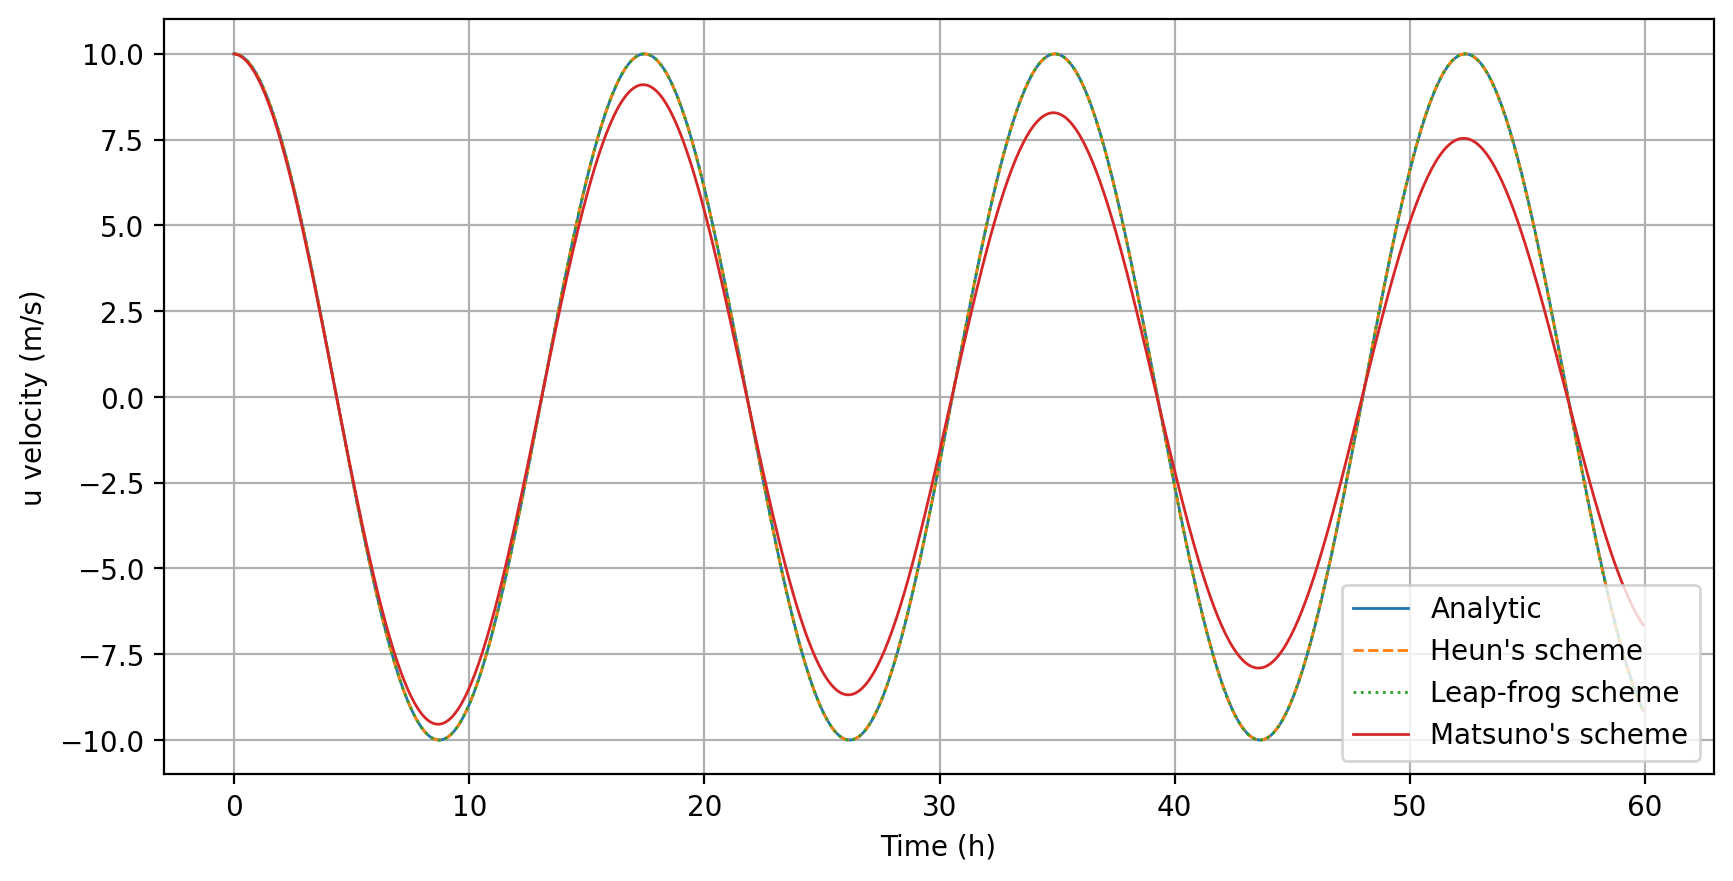

In [11]:
plt.plot(timeh, u_analytic, label="Analytic", color=analcolor)
plt.plot(timeh, u_heun, linestyle='dashed', label="Heun's scheme", color=heuncolor)
plt.plot(timeh, u_leap, linestyle='dotted', label="Leap-frog scheme", color=leapcolor)
plt.plot(timeh, u_matsuno, label="Matsuno's scheme", color=matscolor)
plt.legend(loc='lower right')
plt.xlabel('Time (h)')
plt.ylabel('u velocity (m/s)')
plt.grid(True)

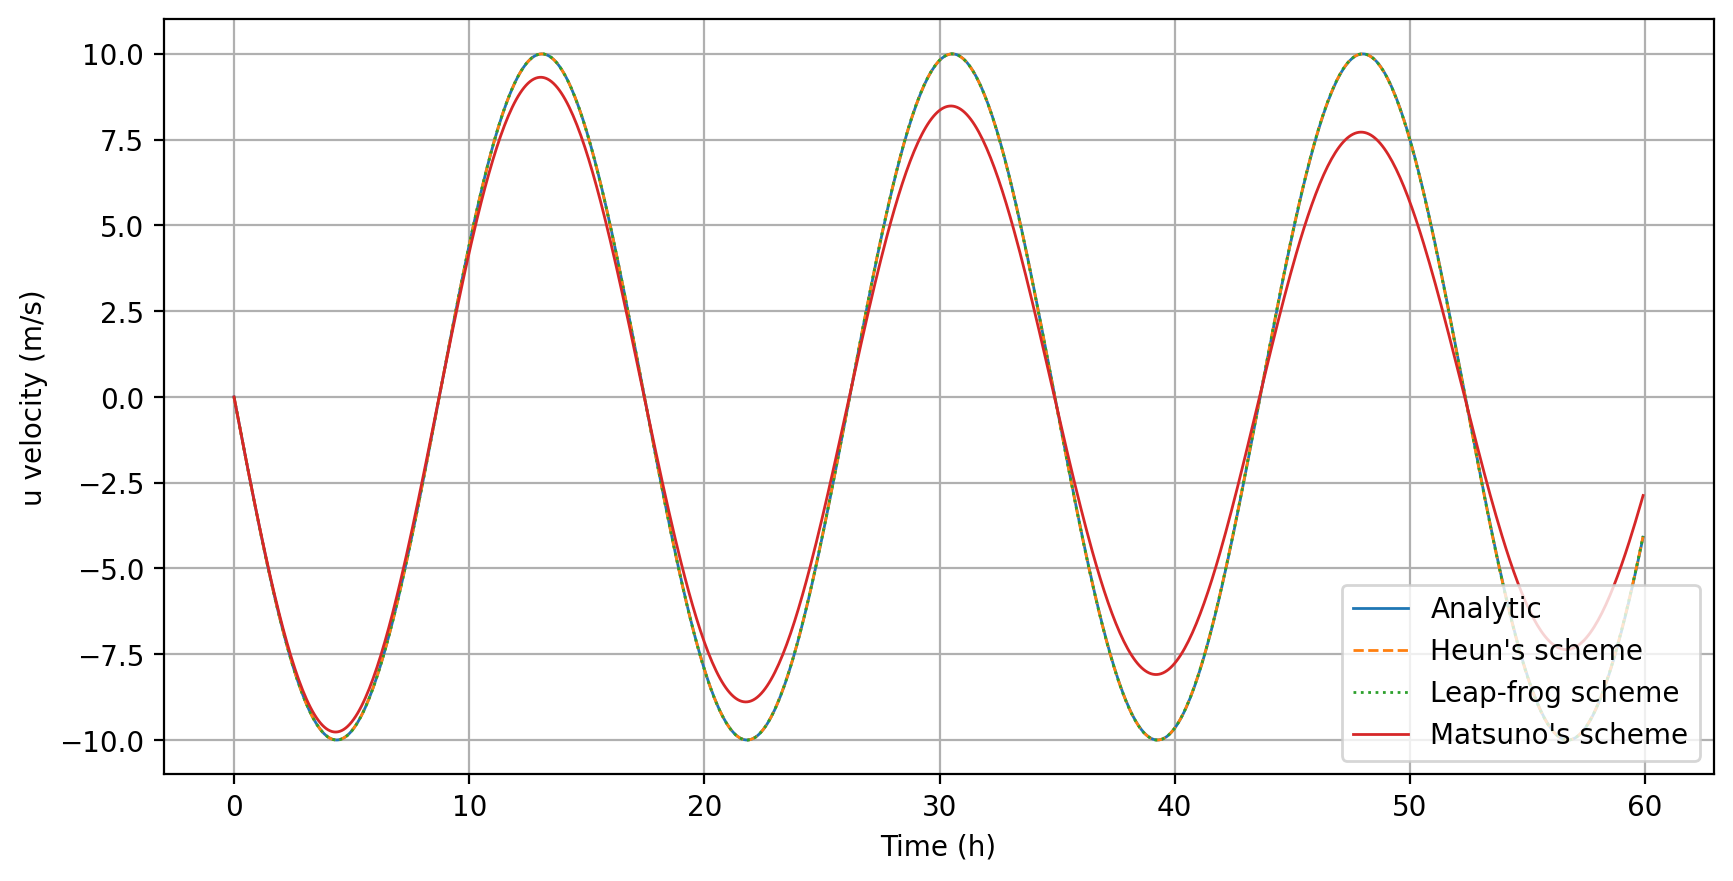

In [12]:
plt.plot(timeh, v_analytic, label="Analytic", color=analcolor)
plt.plot(timeh, v_heun, linestyle='dashed', label="Heun's scheme", color=heuncolor)
plt.plot(timeh, v_leap, linestyle='dotted', label="Leap-frog scheme", color=leapcolor)
plt.plot(timeh, v_matsuno, label="Matsuno's scheme", color=matscolor)
plt.legend(loc="lower right") #I do not know where the legend fits best
plt.xlabel('Time (h)')
plt.ylabel('u velocity (m/s)')
plt.grid(True)

# Plot KE

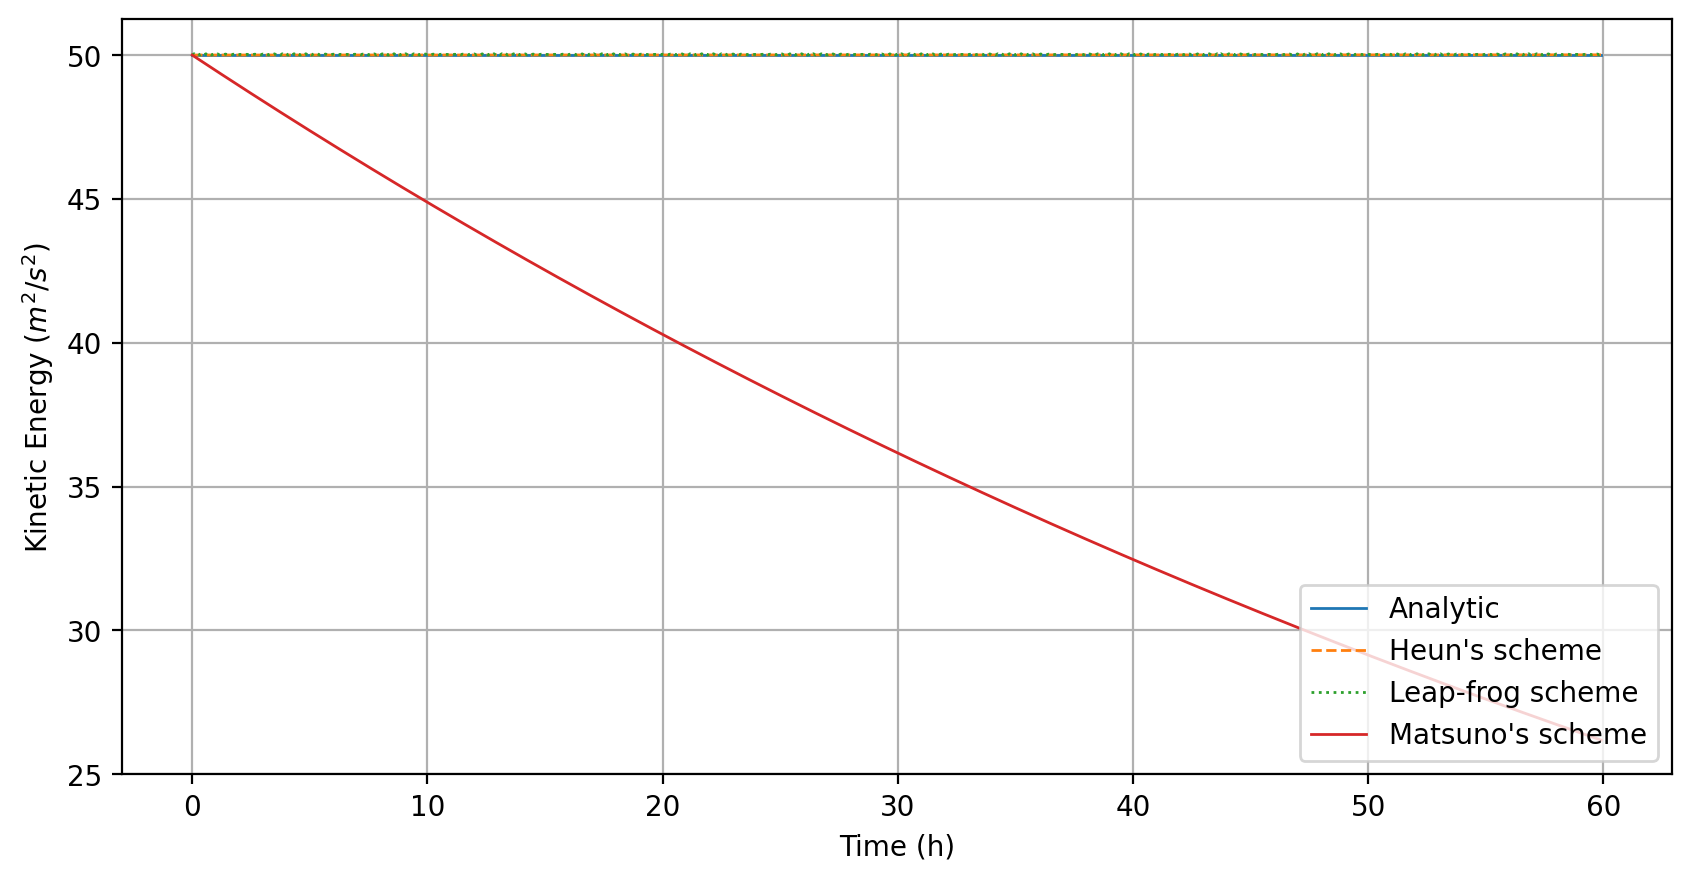

In [13]:
def KE(u, v):
    return (u**2 + v**2) / 2

#Zoomed out plot Kinetic Energy
plt.plot(timeh, KE(u_analytic, v_analytic), label="Analytic", color=analcolor)
plt.plot(timeh, KE(u_heun, v_heun), linestyle='dashed', label="Heun's scheme", color=heuncolor)
plt.plot(timeh, KE(u_leap, v_leap), linestyle='dotted', label="Leap-frog scheme", color=leapcolor)
plt.plot(timeh, KE(u_matsuno, v_matsuno), label="Matsuno's scheme", color=matscolor)
#plt.xlim(0, 1)
plt.legend(loc="lower right")
plt.xlabel('Time (h)')
plt.ylabel('Kinetic Energy ($m^2$/$s^2$)')
plt.grid(True)

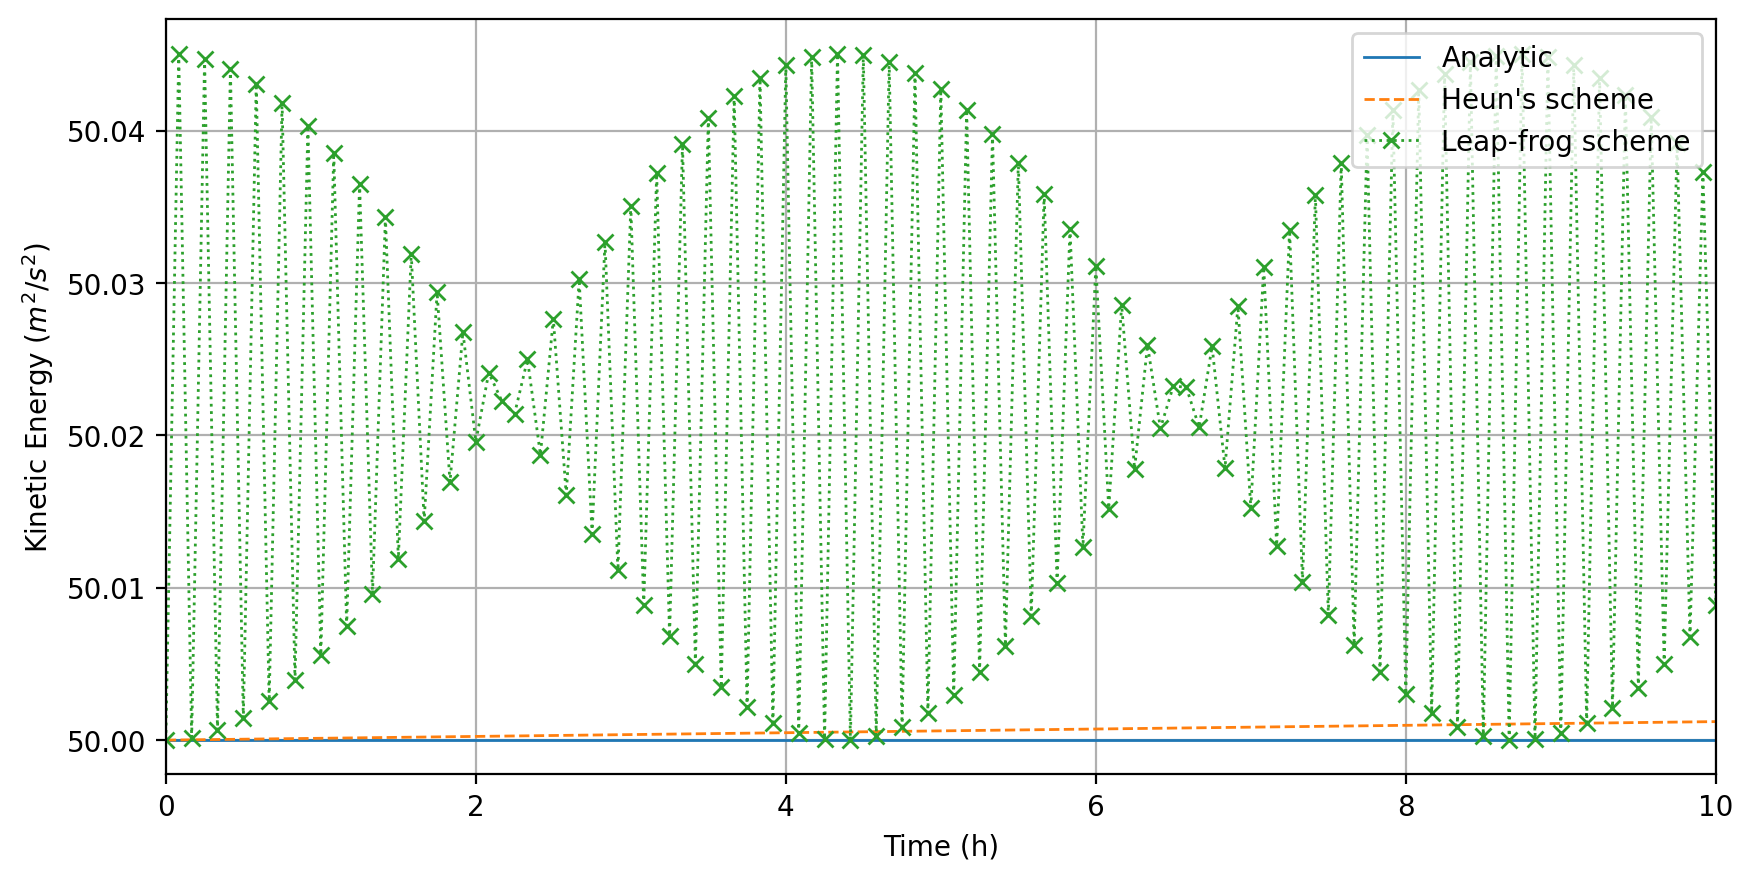

In [14]:
plt.plot(timeh, KE(u_analytic, v_analytic), label="Analytic", color=analcolor)
plt.plot(timeh, KE(u_heun, v_heun), linestyle='dashed', label="Heun's scheme", color=heuncolor)
plt.plot(timeh, KE(u_leap, v_leap), linestyle='dotted', label="Leap-frog scheme", marker='x', color=leapcolor)
# plt.plot(timeh, KE(u_matsuno, v_matsuno), label="Matsuno's scheme")
plt.xlim(0, 10)
plt.legend(loc='upper right')#loc='center left',bbox_to_anchor=(1.01, 0.5)) #I do not know where the legend fits best
plt.xlabel('Time (h)')
plt.ylabel('Kinetic Energy ($m^2$/$s^2$)')
plt.grid(True)

(0.0, 15.0)

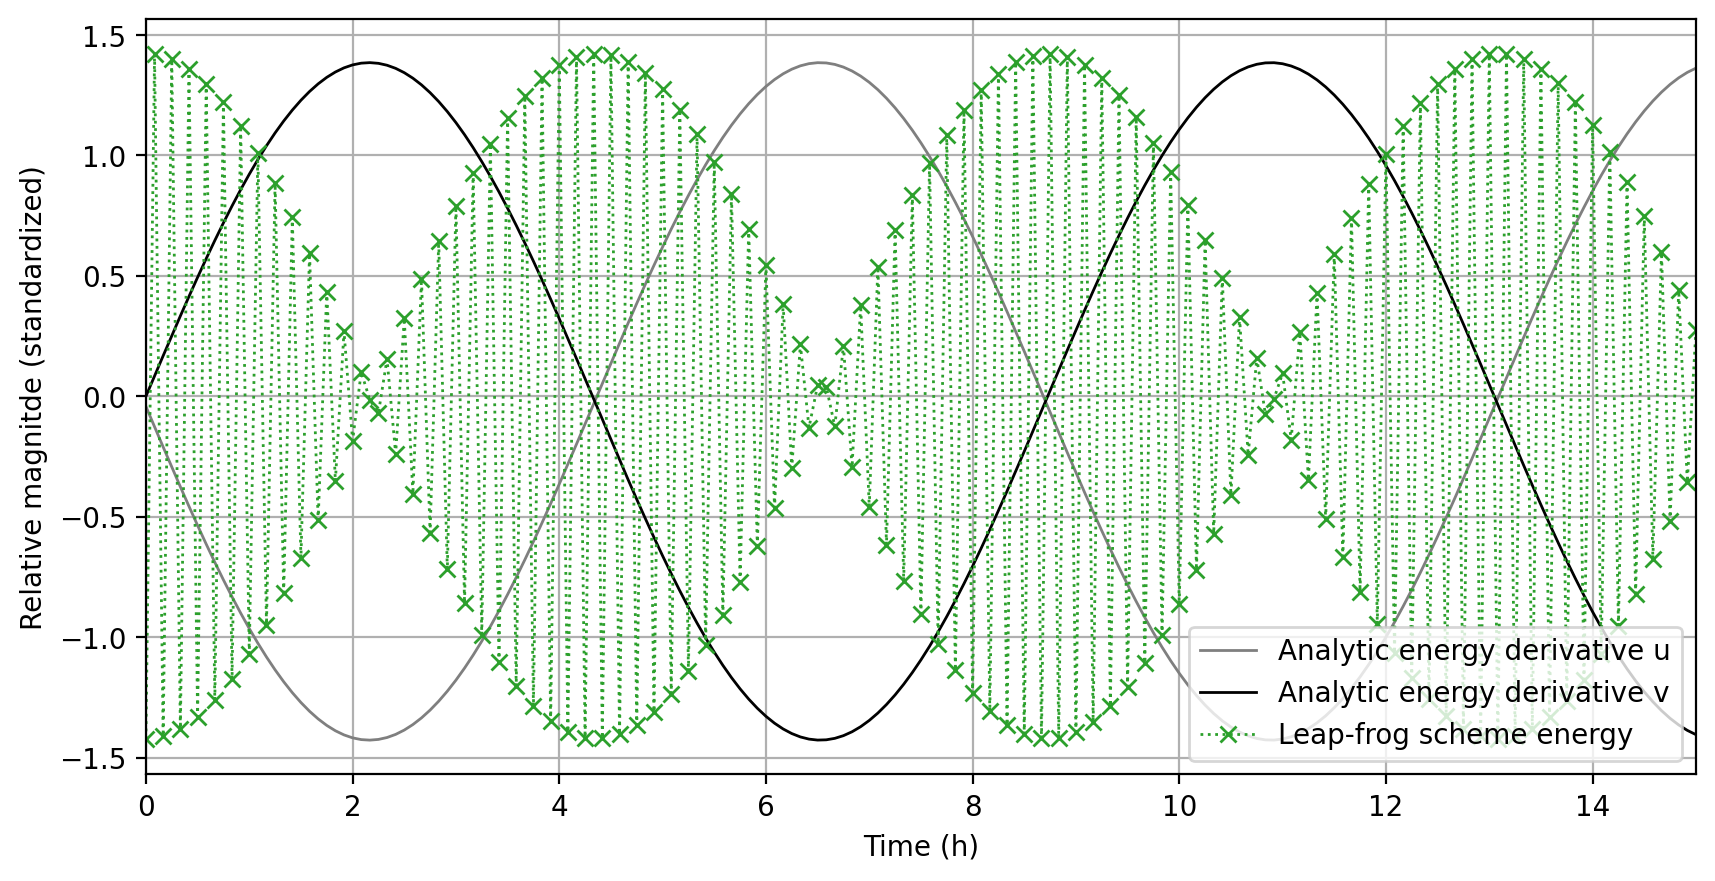

In [15]:
dif = np.diff(u_analytic)
vdif = np.diff(v_analytic)

plt.plot(timeh[:-1], u_analytic[:-1] * dif/ np.std(u_analytic[:-1] * dif), label="Analytic energy derivative u", color="tab:gray")
plt.plot(timeh[:-1], v_analytic[:-1] * vdif/ np.std(v_analytic[:-1]* vdif), label="Analytic energy derivative v", color="black")
plt.plot(timeh, (KE(u_leap, v_leap) - np.mean(KE(u_leap, v_leap))) / np.std(KE(u_leap, v_leap)), linestyle='dotted', label="Leap-frog scheme energy", marker='x', color=leapcolor)

plt.xlabel('Time (h)')
plt.ylabel("Relative magnitde (standardized)")
plt.grid(True)
plt.legend(loc="lower right")
plt.xlim(0, 15)

# Plot Error

In [16]:
def Vtot(u,v):
    '''Calculation total velocity'''
    Vtot=np.sqrt((u**2)+(v**2))
    return Vtot


def Error2(u, v, u_analytic, v_analytic):
    '''Calculation difference total velocity numerical scheme and analystical solution'''
    u = np.array(u)
    v = np.array(v)
    u_analytic = np.array(u_analytic)
    v_analytic = np.array(v_analytic)
    Vtotscheme=Vtot(u,v)
    Vtotan=Vtot(u_analytic,v_analytic)
    Er=Vtotscheme-Vtotan
    return Er

#Array of delta t's
Dt=np.array([10,20,50,100,200,500,1000])

tmax = 60 # time in h
length_arr = np.array(tmax * 3600 / Dt + 1, dtype=int)
time_arr = []
for idx, d_t in enumerate(Dt):
    time_arr.append(np.arange(0, d_t*length_arr[idx], d_t))

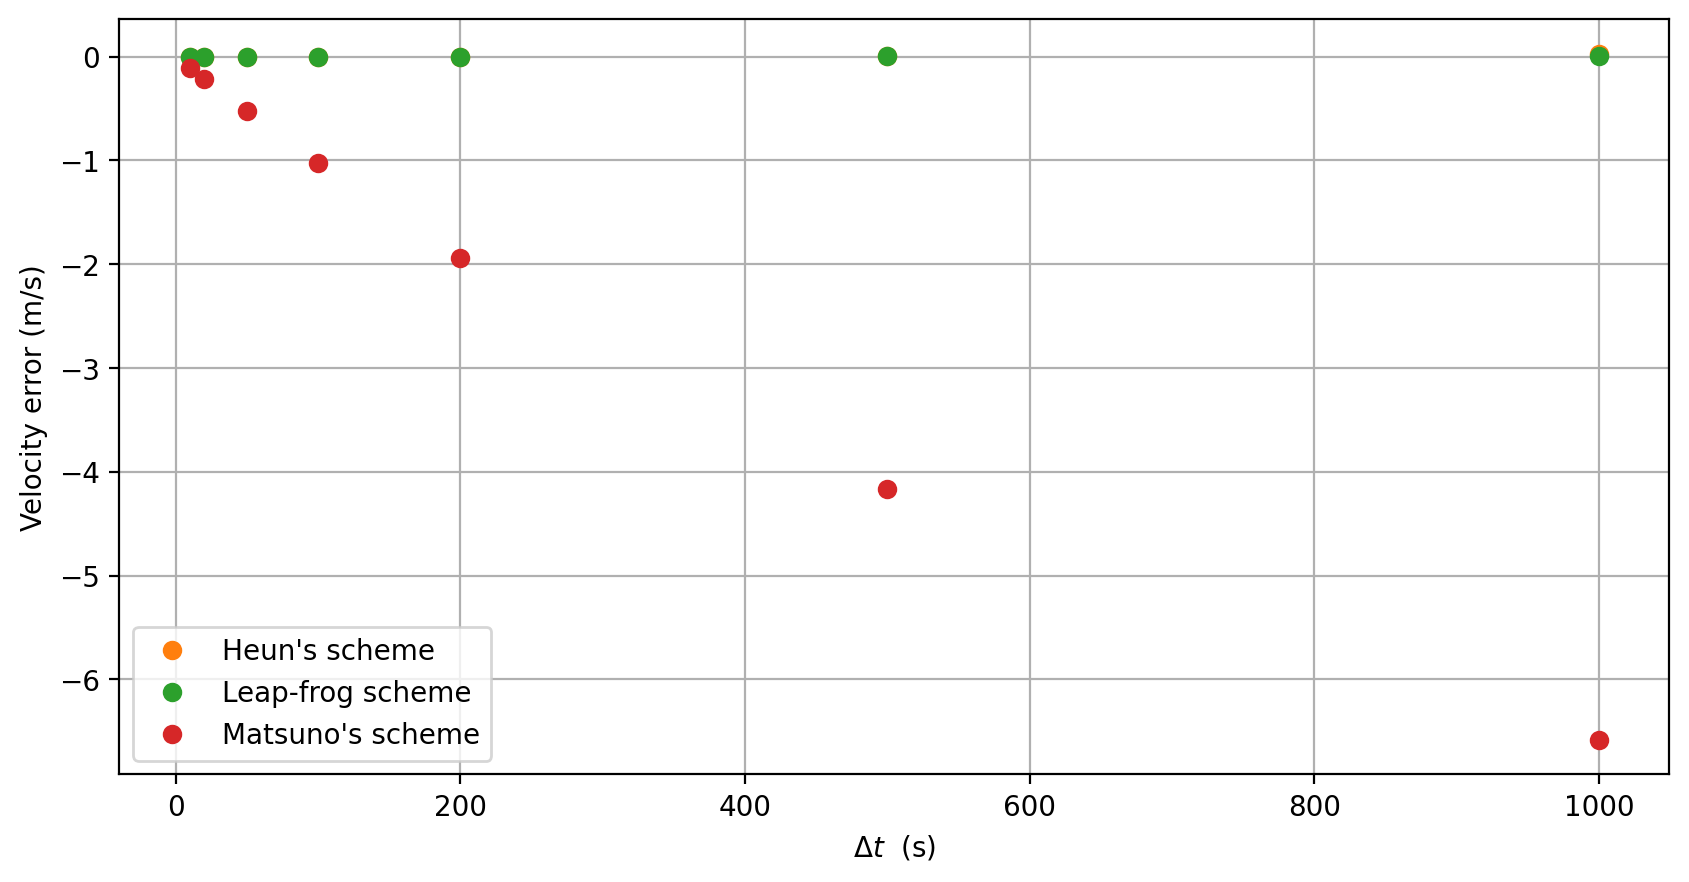

In [17]:
#Create arrays for multiple delta t's. 
#array: row,columns. 

u_forward_dt=[]
v_forward_dt=[]
u_leap_dt=[]
v_leap_dt=[]
u_matsuno_dt=[]
v_matsuno_dt=[]
u_heun_dt=[]
v_heun_dt=[]
u_analytic_dt=[]
v_analytic_dt=[]

for idx, d_t in enumerate(Dt):
    uana, vana = analytic(u0, v0, time_arr[idx])
    ufor, vfor=forward_arr(d_t,length_arr[idx],u0,v0)
    ulea,vlea=leapfrog_arr(d_t, length_arr[idx], u0, v0)
    umat,vmat=multi_step_arr(d_t, length_arr[idx], u0, v0, 0, 1)
    uheu,vheu=multi_step_arr(d_t, length_arr[idx], u0, v0, .5, .5)
    u_forward_dt.append(ufor[-1])
    v_forward_dt.append(vfor[-1])
    u_leap_dt.append(ulea[-1])
    v_leap_dt.append(vlea[-1])
    u_matsuno_dt.append(umat[-1])
    v_matsuno_dt.append(vmat[-1])
    u_heun_dt.append(uheu[-1])
    v_heun_dt.append(vheu[-1])
    u_analytic_dt.append(uana[-1])
    v_analytic_dt.append(vana[-1])

# for i in range(len(leap_err)):
forward_err = Error2(u_forward_dt,v_forward_dt,u_analytic_dt,v_analytic_dt)
leap_err = Error2(u_leap_dt,v_leap_dt,u_analytic_dt,v_analytic_dt)
matsuno_err = Error2(u_matsuno_dt,v_matsuno_dt,u_analytic_dt,v_analytic_dt)
heun_err = Error2(u_heun_dt,v_heun_dt,u_analytic_dt,v_analytic_dt)


plt.plot(Dt, heun_err, 'o',label="Heun's scheme", color=heuncolor)
plt.plot(Dt, leap_err, 'o', label="Leap-frog scheme", color=leapcolor)
plt.plot(Dt, matsuno_err, 'o',label="Matsuno's scheme", color=matscolor)
plt.legend(loc="lower left")
plt.xlabel(f'$\Delta t$  (s)')
plt.ylabel('Velocity error (m/s)')
plt.grid(True)

(-0.0001, 0.001)

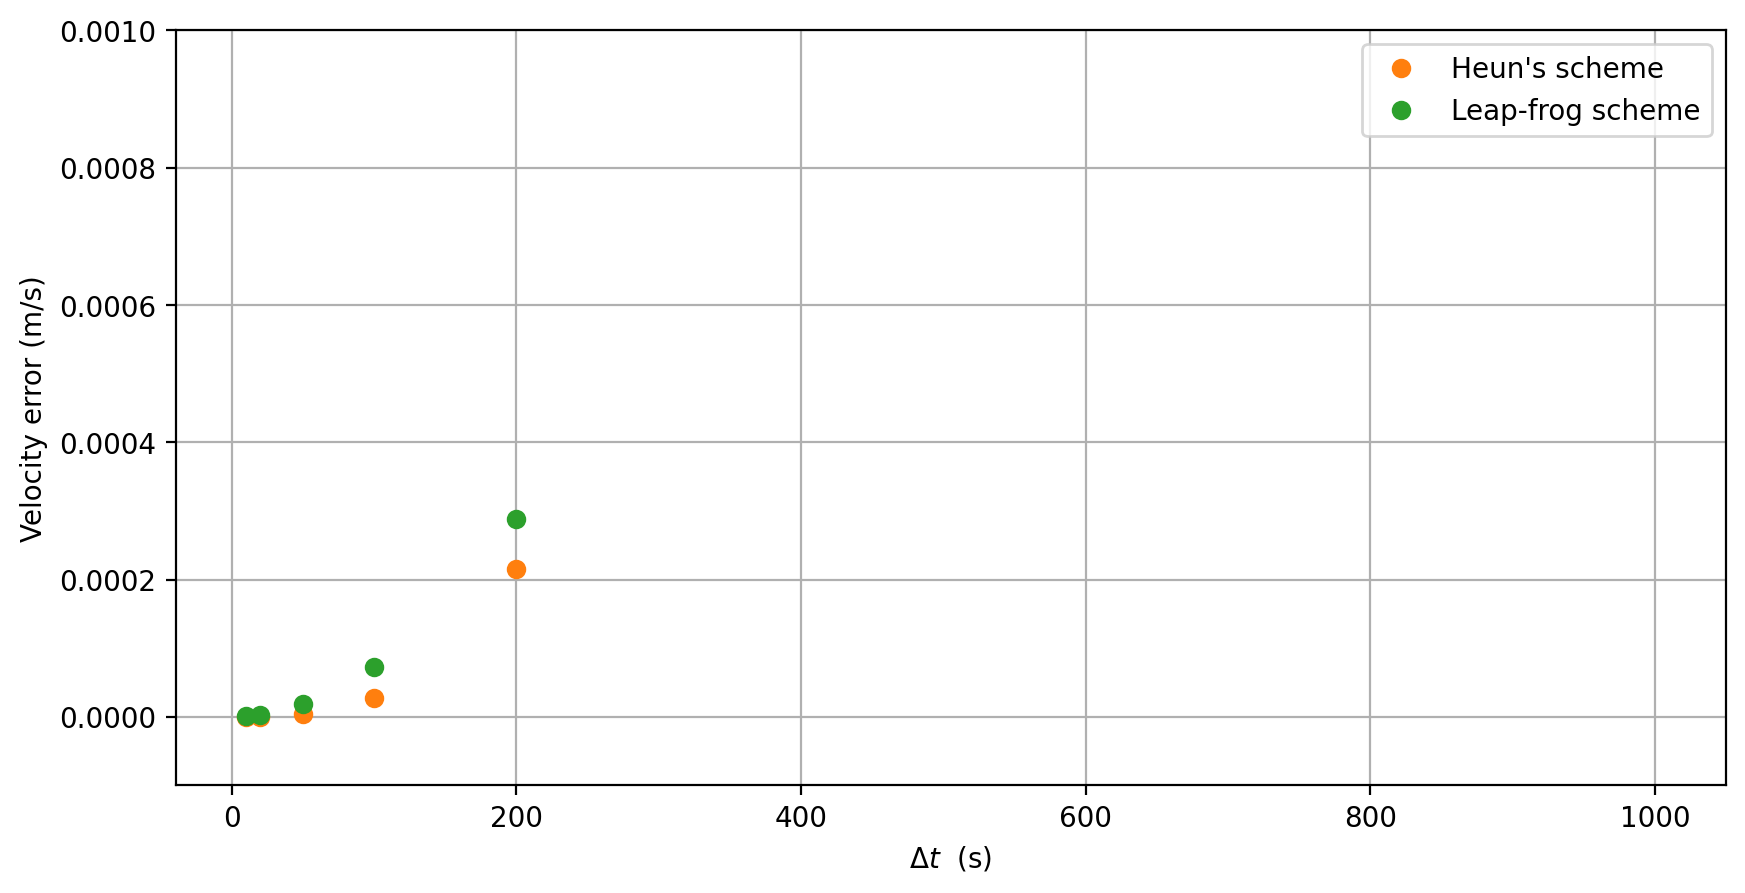

In [18]:
#Zoomed in plot

plt.plot(Dt, heun_err, 'o',label="Heun's scheme", color=heuncolor)
plt.plot(Dt, leap_err, 'o', label="Leap-frog scheme", color=leapcolor)
#plt.plot(Dt, matsuno_err,'o', label="Matsuno's scheme")
plt.legend()
plt.xlabel(f'$\Delta t$  (s)')
plt.ylabel('Velocity error (m/s)')
plt.grid(True)
plt.ylim(-0.0001,0.001)
# at beginning, heuns scheme better than leap frog but leap frog better for longer runs/larger dt

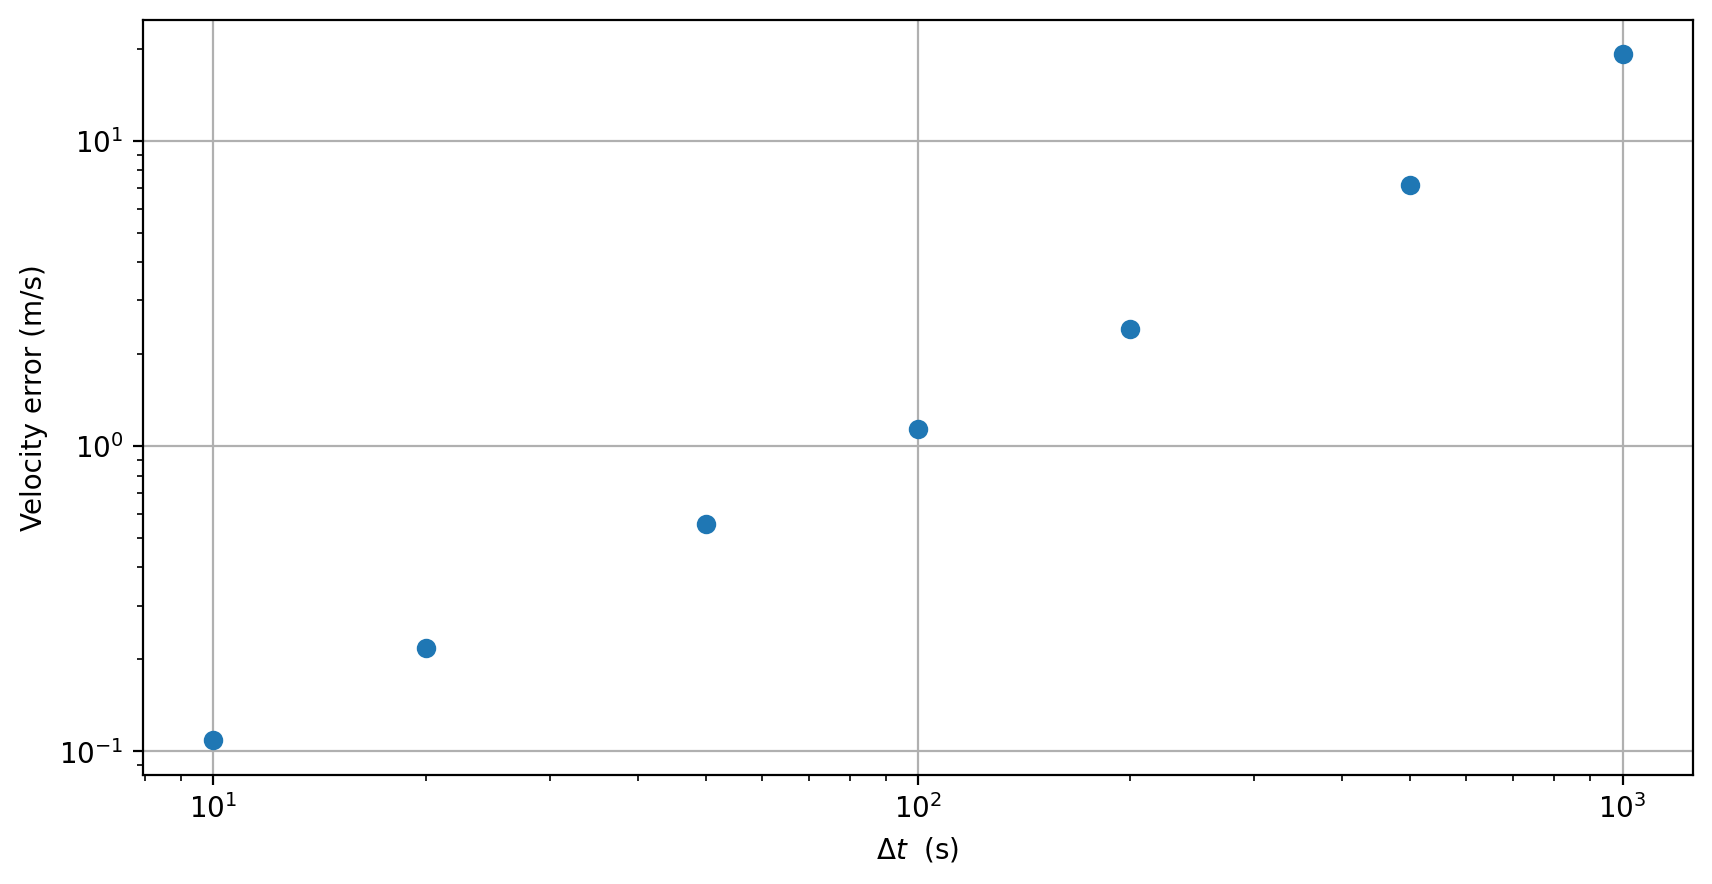

In [19]:
#Plot Eurler forward to check whether done right
plt.plot(Dt,forward_err,'o')
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Velocity error (m/s)")
plt.xlabel(f'$\Delta t$  (s)')
plt.grid()